## TikTok Data Analysis

Dataset - https://www.kaggle.com/datasets/zedataweaver/tiktok-dataset/code

**Business Onjective:** Use machine learning to classify videos as either claims or opinions. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tiktok_dataset.csv')
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


<img src="![image.png](attachment:68b1654d-137f-4aa0-83e0-ca6d3c7c735d.png)" alt="DataDictionary" width="300" height="200">

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [4]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [79]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
likes_per_view              298
comments_per_view           298
shares_per_view             298
dtype: int64

In [8]:
df['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [10]:
df['author_ban_status'].value_counts()

author_ban_status
active          15663
under review     2080
banned           1639
Name: count, dtype: int64

In [9]:
df['verified_status'].value_counts()

verified_status
not verified    18142
verified         1240
Name: count, dtype: int64

**Observations:**
1. The dataset contains five float64s, three int64s, and four objects. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.
2. Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values, which means few videos seem to be popular than others.
3. The dataset has a balanced count of each claim status.
4. There are a lot of unverified users
5. Further we can investigate if there is any significant relation between claim_status and other variables

In [12]:
## Examining claim_status variable
df.groupby(['claim_status','author_ban_status']).size().reset_index(name='video_count')

,claim_status,author_ban_status,video_count
0,claim,active,6566
1,claim,banned,1439
2,claim,under review,1603
3,opinion,active,8817
4,opinion,banned,196
5,opinion,under review,463


In [14]:
df.groupby(['claim_status']).agg({'video_view_count':['mean','median'],
                                  'video_like_count':['mean','median'],
                                  'video_share_count':['mean','median'],
                                  'video_download_count':['mean','median'],
                                  'video_comment_count':['mean','median']})

video_view_count           video_like_count            \
                         mean    median             mean    median   
claim_status                                                         
claim           501029.452748  501555.0    166373.331182  123649.0   
opinion           4956.432250    4953.0      1092.729844     823.0   

             video_share_count          video_download_count          \
                          mean   median                 mean  median   
claim_status                                                           
claim             33026.416216  17997.5          2070.952227  1139.5   
opinion             217.145631    121.0            13.677290     7.0   

             video_comment_count         
                            mean median  
claim_status                             
claim                 691.164863  286.0  
opinion                 2.697446    1.0

**Observations:**
1. There are more claim videos with banned authors than there are opinion videos with banned authors which could mean that the claim videos are more strictly policed than opinion videos i.e, Authors must comply with a stricter set of rules if they post a claim than if they post an opinion. But the author's ban status doesn't directly say much about the claim status of the video.
2. The mean and the median within each claim category are close to one another(for view_count), but there is a vast discrepancy between counts variables for videos labeled as claims and videos labeled as opinions. For the count variables it is best to take median values  into account(for comparing) as some of the videos can have high values(outliers) which makes mean not a suitable estimator.

In [16]:
df.groupby(['author_ban_status']).agg({'video_view_count':['count','mean','median'],
                                  'video_like_count':['count','mean','median'],
                                  'video_share_count':['count','mean','median'],
                                  'video_download_count':['count','mean','median'],
                                  'video_comment_count':['count','mean','median']})

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                           video_download_count                      \
                    median                count         mean median   
author_ban_status                                                     
active               437.0                15383   882.276344   28.0   
banned             14468.0                 1635  1886.296024  892.0   
under review        9444.0                 2066  1631.734753  610.5   

                  video_comment_count                     
                                count        mean median  
author_ban_status                                         
active                          15383  295.134499    5.0  
banned                           1635  614.956575  209.0  
under review                     2066  542.480639  136.5

**Observations:**
1. Banned authors and those under review get far more views, likes, and shares than active authors.
2. In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

In [17]:
# Let's standardise these all the video_counts by per view so that it will be more clearer to compare
# these values can illustrate the rate of engagement
df['likes_per_view']= df['video_like_count'] / df['video_view_count']
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']

In [18]:
df.groupby(['claim_status','author_ban_status']).agg({'likes_per_view':['count','mean','median'],
                                  'comments_per_view':['count','mean','median'],
                                  'shares_per_view':['count','mean','median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

**Observations:**
1. We can observe that there is no significant difference in the engagement rate of authors of different ban status and same claim status.
2. There is significant difference in engagement rate among the different claim statuses.
3. **The engagement rate is less related to author ban status and more related to its claim status.**
4. Claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.
5. For claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories

## Visualisations

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  likes_per_view            19084 non-null  float64
 13  comments_per_view         19084 non-null  float64
 14  shares

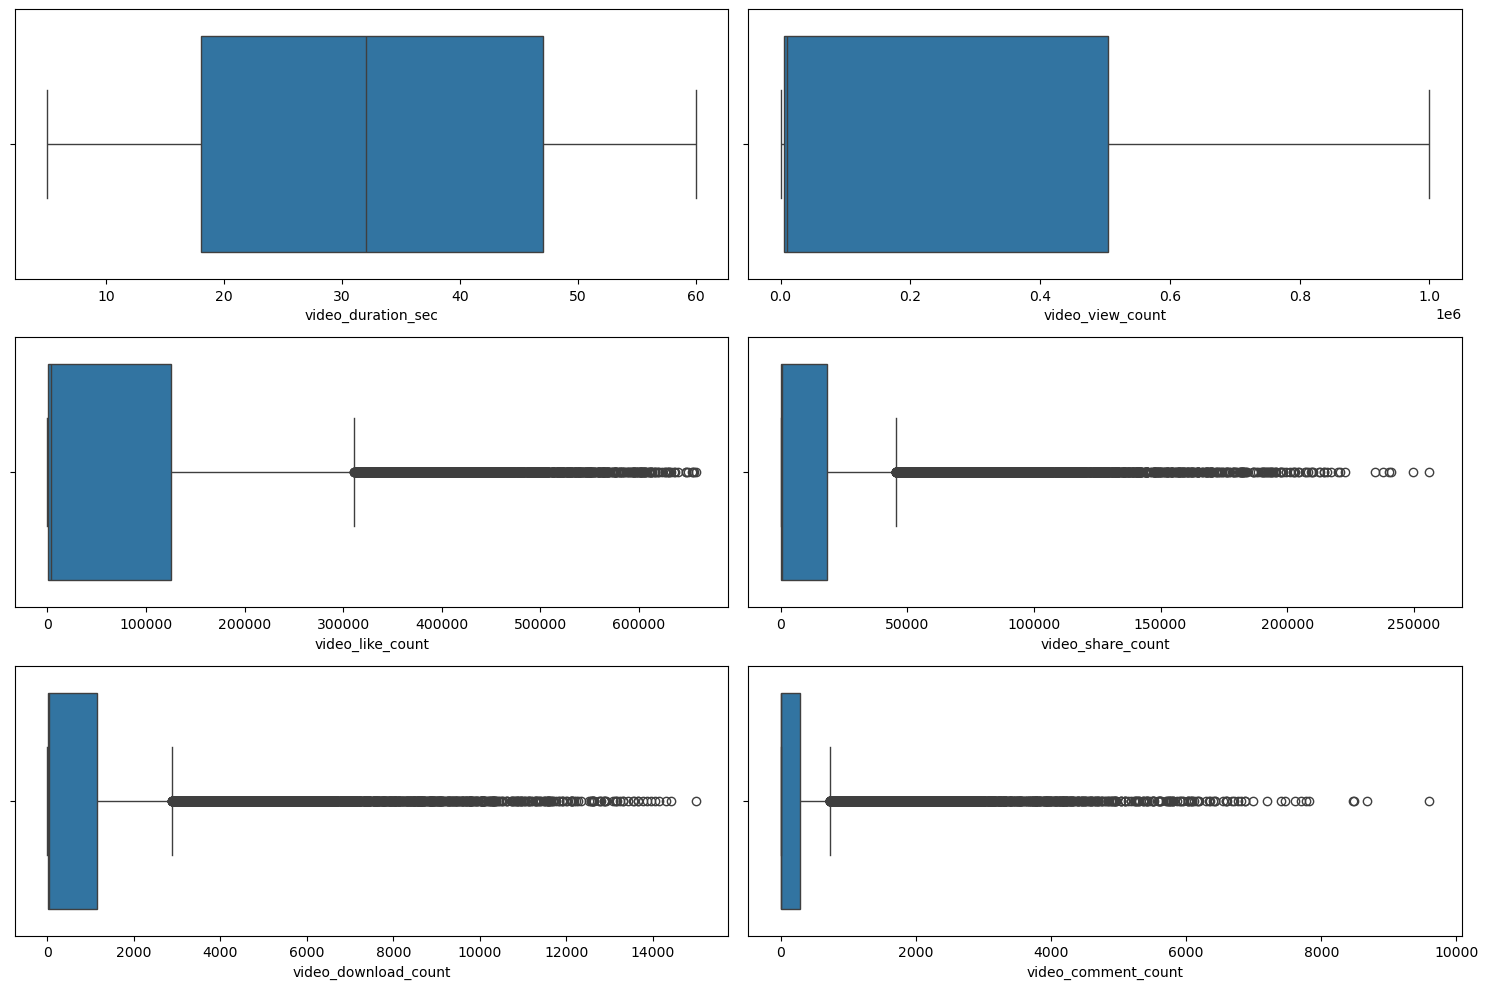

In [35]:
# Ploting Numerical variables
num_cols  = ['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']
n = len(num_cols)
nrows = (n // 2) if (n % 2 == 0) else (n // 2 + 1)
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(5 * nrows, 10))
for i,col in enumerate(num_cols):
    sns.boxplot(df[col],ax=ax[i//2, i%2],orient='h')
plt.tight_layout()

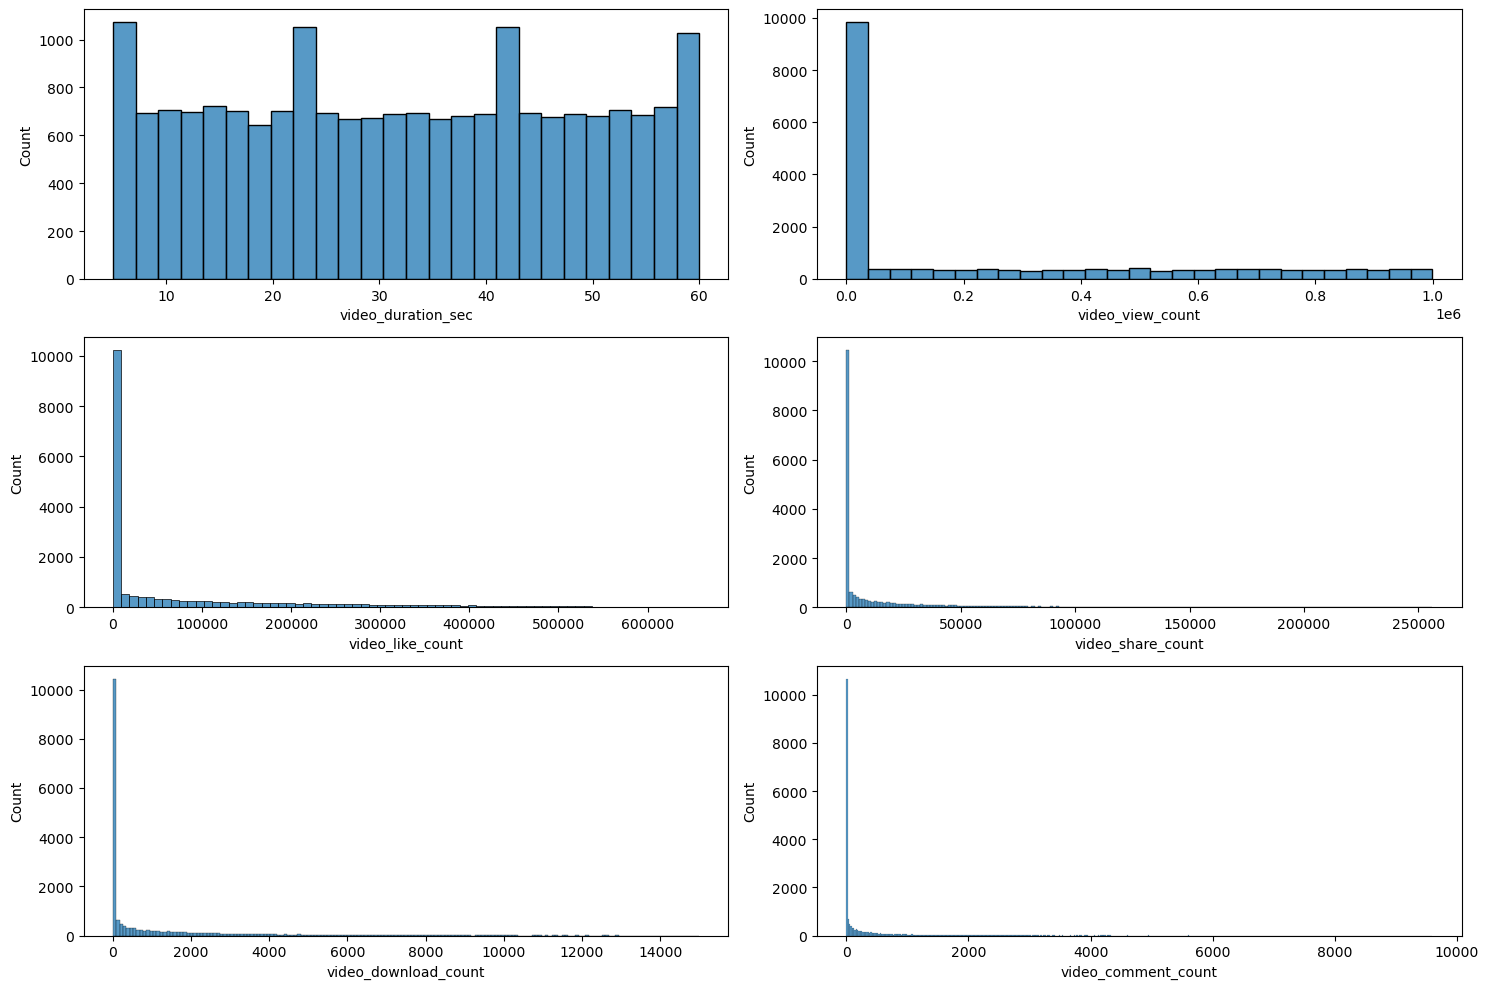

In [37]:
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(5 * nrows, 10))
for i,col in enumerate(num_cols):
    sns.histplot(df[col],ax=ax[i//2, i%2])
plt.tight_layout()

**Observations:**
1. All videos are 5-60 seconds in length, and the distribution is uniform.
2. Video_view_Count variable has a very uneven distribution, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts > 100,000 views is uniform.
3. video_like_Count Similar to view count, there are far more videos with < 100,000 likes than there are videos with more. However, in this case, there is more of a taper, as the data skews right, with many videos at the upper extremity of like count.
4. Most videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.
5. The overwhelming majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.
6. The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
 12  likes_per_view            19084 non-null  float64
 13  comments_per_view         19084 non-null  float64
 14  shares

In [42]:
#cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
cat_col=['claim_status','verified_status','author_ban_status']

<Axes: xlabel='claim_status', ylabel='Count'>

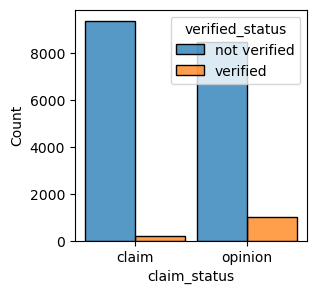

In [52]:
plt.figure(figsize=(3,3))
sns.histplot(data=df,x='claim_status',hue='verified_status',multiple='dodge',shrink=0.9)

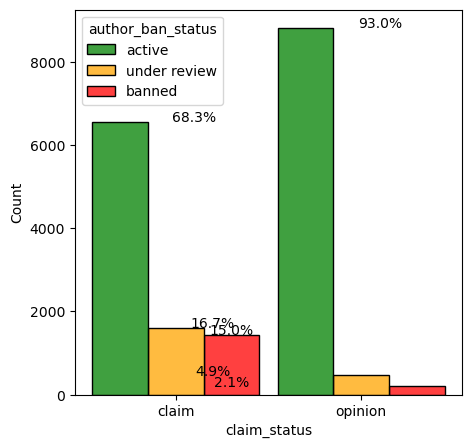

In [69]:
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='claim_status',hue='author_ban_status',multiple='dodge',hue_order=['active', 'under review', 'banned'],palette={'active':'green', 'under review':'orange', 'banned':'red'},shrink=0.9)
# Calculate and annotate the proportions
# Get the counts for each combination of 'claim_status' and 'author_ban_status'
counts = df.groupby(['claim_status', 'author_ban_status']).size()

# Calculate total counts for each 'claim_status'
total_counts = df['claim_status'].value_counts()

# Annotate the bars with the proportion
for (claim_status, author_ban_status), count in counts.items():
    proportion = count / total_counts[claim_status]
    
    # Find the position of the bar in the plot
    bar_position = (
        df['claim_status'].unique().tolist().index(claim_status) + 
        0.1 if author_ban_status == 'active' else 
        0.2 if author_ban_status == 'under review' else 
        0.3
    )
    
    # Annotate each bar
    plt.text(
        x=bar_position,
        y=count + 0.5,
        s=f'{proportion:.1%}',
        ha='center',
        fontsize=10,
        color='black'
    )


plt.show()

**Observations:**
1. verified users are more likely to post opinions.
2. For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos.
3. non-active authors(banned, under_review) are more likely to post claims

/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_75855/1535675241.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


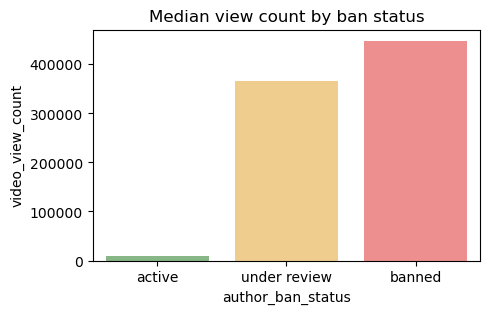

In [71]:
ban_status_counts = df.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

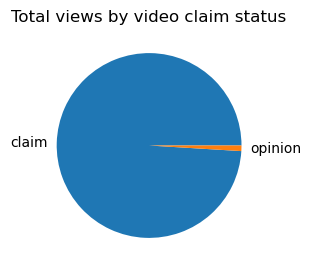

In [73]:
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

**Observations:**
1.  Since you know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.
2. The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### Outliers

Since we are building a predictive model dealing with outliers is important to improve the accuracy of the model.

From the boxplots of the numerical variables, we have observed many of them have outliers.
As all these outliers follow natural trend there is no need to remove them.

In [76]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (df[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


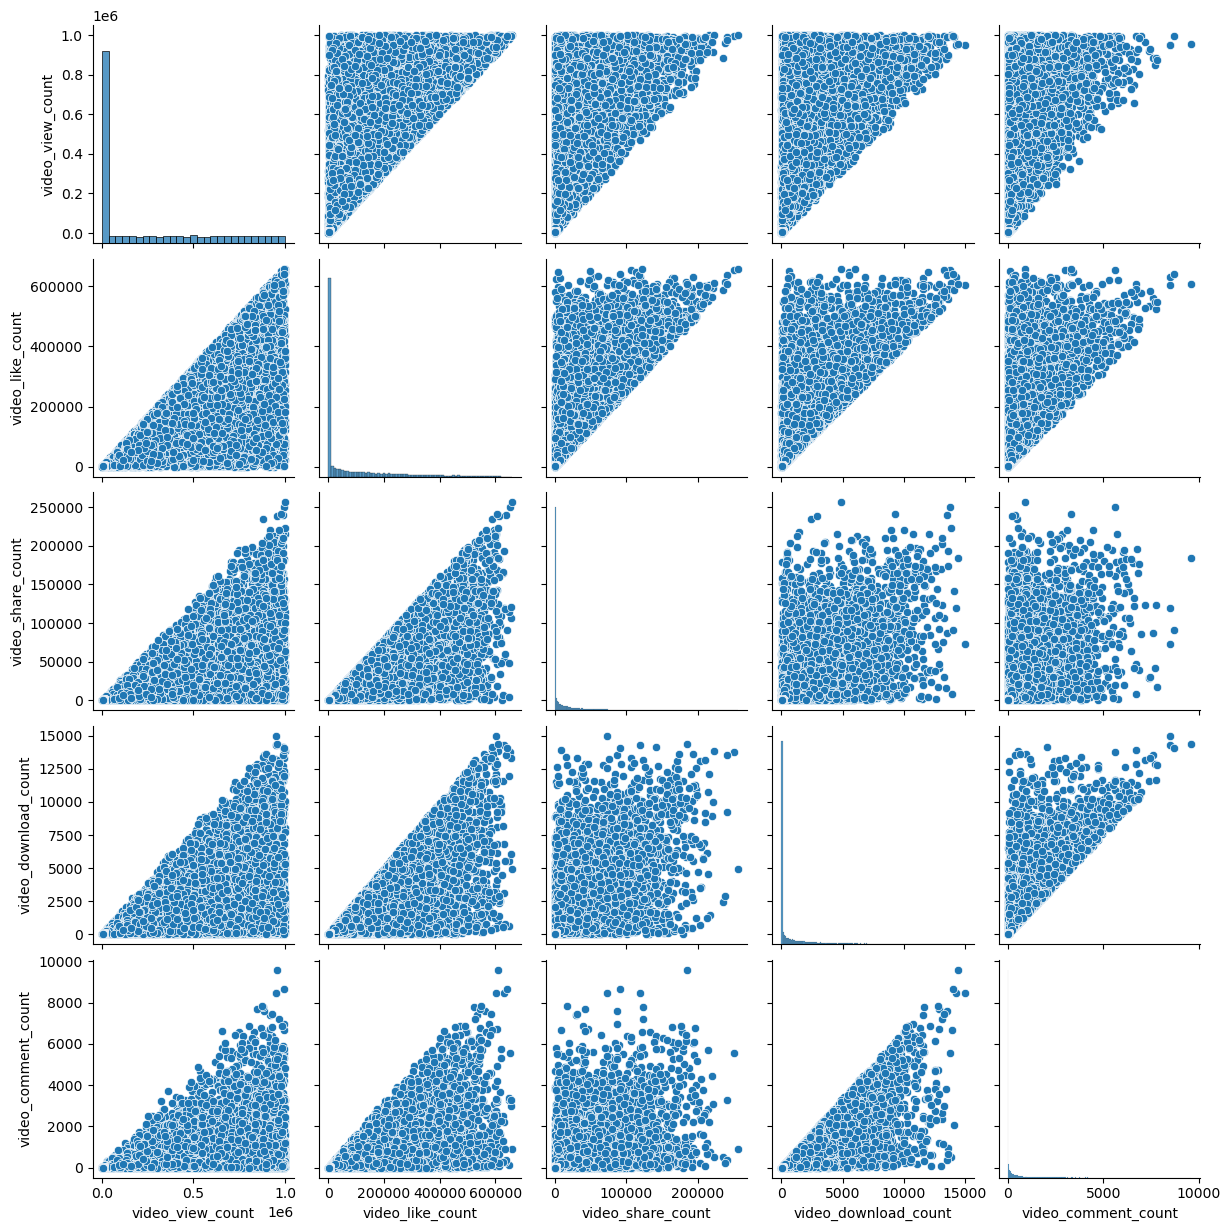

In [77]:
sns.pairplot(df[count_cols])

### Hypothesis Testing
H0: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts

H1: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts 

In [87]:
from scipy import stats

In [83]:
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
likes_per_view              298
comments_per_view           298
shares_per_view             298
dtype: int64

In [84]:
# one approach to check the relation between 'verified_status' and 'video_view_count' is examine their mean values 
df1 = df.dropna(axis=0)
df1.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [90]:
# lets test if the above difference is due to random chance or not

not_verified = df1[df1["verified_status"] == "not verified"]["video_view_count"]
verified = df1[df1["verified_status"] == "verified"]["video_view_count"]

# two sample t-test 
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

**Observation:**
Since p-value < 0.05(5% significance level), reject H0 i.e, there is a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.